# Elliptically Polarized Light

Exploration of the electric field of polarized light using Jupyter.

In [1]:
from sympy import *

We consider the $x$ and $y$ components of polarized light which
can be formulated as:
$$E_x = E_{x0}\cos(\omega t - k_z z)$$
$$E_y = E_{y0}\cos(\omega t - k_z z + \phi)$$

Evaluating $\phi$ on $[0, 2\pi]$ changes the e-field
from linear to circular polarization.
Also notice that this field is uniform throughout $R^3$, that is,
the e-field vector does not depend on $(x,y)$.

## Assumptions...

Assuming $E_{x0} = E_{y0} = 1$...
Also, lets fix $t=0$ and evaluate $z$ on $[0,2\pi]$

And again, for simplicity, we set $k_z = 1$

In [15]:
from sympy.abc import z, phi

In [17]:
E_x = cos(z)
E_x

cos(z)

In [19]:
E_y = cos(z + phi)
E_y

cos(phi + z)

Convert to Numpy Function for Speedy Evaluation

In [26]:
e_field = lambdify((z,phi),Matrix([E_x,E_y]),"numpy")

## E-field evaluated at 
$$x=y=0$$
$$z = [0, 2 \pi]$$
$$\phi = 0$$

Remember that this particular e-field formulation is independent of $(x,y)$,
being uniform throughout $R^3$ as noted earlier.
That is, we could just as easily have chosen $x=y=3$.

In [36]:
import matplotlib.pyplot as plt
import matplotlib.animation

In [29]:
import numpy as np

In [151]:
%%capture 
fig, ax = plt.subplots()
phi = 0
U,V = e_field(0,phi)
quiver = ax.quiver(0, 0,U, V,units='xy' ,scale=1)

def update(z):
    global phi
    global quiver
    quiver.remove()
    U,V = e_field(z,phi)
    quiver = ax.quiver(0, 0,U, V,units='xy' ,scale=1)
    ax.set_title(f"z = {format(z,'.2f')}, $\\phi = {format(phi,'.2f')}$")

ani = matplotlib.animation.FuncAnimation(fig, update, 
        frames=np.linspace(0,2*np.pi,100), interval=30)
plt.grid()

ax.set_aspect('equal')

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
#plt.show

In [95]:
HTML(ani.to_html5_video())

## E-field evaluated at 
$$x=y=0$$
$$z = [0, 2 \pi]$$
$$\phi = \frac {\pi} {2}$$

In [152]:
%%capture
fig, ax = plt.subplots()
phi = np.pi/2
U,V = e_field(0,phi)
quiver = ax.quiver(0, 0,U, V,units='xy' ,scale=1)

def update(z):
    global phi
    global quiver
    quiver.remove()
    U,V = e_field(z,phi)
    quiver = ax.quiver(0, 0,U, V,units='xy' ,scale=1)
    ax.set_title(f"z = {format(z,'.2f')}, $\\phi = {format(phi,'.2f')}$")

ani = matplotlib.animation.FuncAnimation(fig, update, 
        frames=np.linspace(0,2*np.pi,100), interval=30)
plt.grid()

ax.set_aspect('equal')

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
#plt.show

In [153]:
HTML(ani.to_html5_video())

## E-field evaluated at 
$$x=y=0$$
$$z = [0, 2 \pi]$$
$$\phi = -\frac {\pi} {2}$$

In [154]:
%%capture
fig, ax = plt.subplots()
phi = -np.pi/2
U,V = e_field(0,phi)
quiver = ax.quiver(0, 0,U, V,units='xy' ,scale=1)

def update(z):
    global phi
    global quiver
    quiver.remove()
    U,V = e_field(z,phi)
    quiver = ax.quiver(0, 0,U, V,units='xy' ,scale=1)
    ax.set_title(f"z = {format(z,'.2f')}, $\\phi = {format(phi,'.2f')}$")

ani = matplotlib.animation.FuncAnimation(fig, update, 
        frames=np.linspace(0,2*np.pi,100), interval=30)
plt.grid()

ax.set_aspect('equal')

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
#plt.show

In [106]:
HTML(ani.to_html5_video())

## Path Traced Out by Vector on $z = [0, 2\pi]$

Now lets take a look at paths traced out by the e-field vector for various values
of $\phi$

### $\phi = \frac{\pi}{2}$

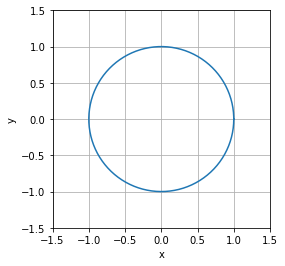

In [138]:
phi = np.pi/2
z_domain = np.linspace(0,2*np.pi,200)
x, y = e_field(z_domain,phi).reshape(2,200)
fig, ax = plt.subplots()

ax.set_aspect('equal')
ax.grid()
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.plot(x,y)

### $\phi = \frac {\pi} {4}$

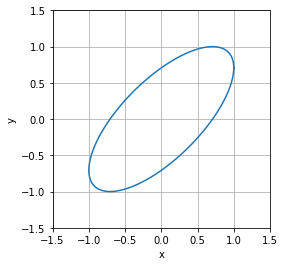

In [139]:
phi = np.pi/4
z_domain = np.linspace(0,2*np.pi,200)
x, y = e_field(z_domain,phi).reshape(2,200)
fig, ax = plt.subplots()

ax.set_aspect('equal')
ax.grid()
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.plot(x,y)

## Sweeping Through Paths on $\phi = [0, 2 \pi]$

In [155]:
%%capture
z_domain = np.linspace(0,2*np.pi,200)

fig, ax = plt.subplots()
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()
l, = ax.plot([],[])

def animate(phi):
    ax.set_title(f"$\\phi = {format(phi,'.2f')}$")
    x, y = e_field(z_domain,phi).reshape(2,200)
    l.set_data(x, y)

ani = matplotlib.animation.FuncAnimation(fig, animate, 
        frames=np.linspace(0,2*np.pi,100),
        interval=30)

In [147]:
HTML(ani.to_html5_video())